In [10]:
import numpy as np
pi=np.pi
dtr=pi/180    #degree to radian
rtd=180/pi    #radian to degree

class signals():
    
    def __init__(self, aryn=8,dd=0.5,iwave=1,theta=-30,snr=-10,n=50):
        if(aryn<=iwave):
            return "aryn needs to be larger than iwave"
        if(n<=aryn):
            return "aryn needs to be smaller than snap "
        self.aryn=aryn     #number of array element
        
        self.dd=dd     #distance between array element
        
        self.d=np.array(np.linspace(0,(aryn-1)*dd,aryn))    #vector of element
        
        self.iwave=iwave     #number of signal
        
        self.theta=np.array(theta)   #angle of signal
        
        self.snr,self.n=snr,n      #snr and snap number
        
        A=np.exp(-1j*2*pi*np.outer(self.d.T,np.sin(self.theta*dtr))) 
        self.sterV=A
        #steering vector, zero in the front, vertical with array, clockwise rotating 
        
        S=10**(snr/20)*np.random.randn(iwave,n)   #signal value, emulating snapping by augment matrix
        
        X=np.mat(np.dot(A,S)+ np.random.randn(aryn,n))    # received signal
        
        self.Rxx=(X*X.H)/n
        
        w,v=np.linalg.eig(self.Rxx)
        
        self.eigValue,self.eigVector=w.real,np.array(v)
        
    def MUSIC(self):
        
        Value=[]
        
        for i in np.linspace(0,360,361):
            
            phim=dtr*(i-180)/2
            
            a=np.mat(np.exp(-1j*2*pi*self.d.reshape(8,1)*np.sin(phim))) # d.T could not be shaped as (8,1)            
            L=self.iwave
            
            En=np.mat(self.eigVector[:,L:self.aryn])
            
            Value.append(a.H*a/(a.H*En*En.H*a))
        
            B=np.array(Value).real.ravel().reshape(-1,1)
            
            
            
        return np.hstack((B,np.linspace(-90,90,361).reshape(-1,1)))


In [11]:

A=signals()
A.MUSIC()

array([[  1.00126433, -90.        ],
       [  1.00126214, -89.5       ],
       [  1.00125565, -89.        ],
       [  1.00124506, -88.5       ],
       [  1.00123074, -88.        ],
       [  1.00121319, -87.5       ],
       [  1.00119304, -87.        ],
       [  1.0011711 , -86.5       ],
       [  1.0011483 , -86.        ],
       [  1.00112574, -85.5       ],
       [  1.00110466, -85.        ],
       [  1.00108645, -84.5       ],
       [  1.00107268, -84.        ],
       [  1.00106505, -83.5       ],
       [  1.00106545, -83.        ],
       [  1.0010759 , -82.5       ],
       [  1.00109861, -82.        ],
       [  1.00113593, -81.5       ],
       [  1.00119039, -81.        ],
       [  1.00126466, -80.5       ],
       [  1.00136157, -80.        ],
       [  1.00148412, -79.5       ],
       [  1.00163541, -79.        ],
       [  1.00181872, -78.5       ],
       [  1.00203742, -78.        ],
       [  1.002295  , -77.5       ],
       [  1.00259504, -77.        ],
 

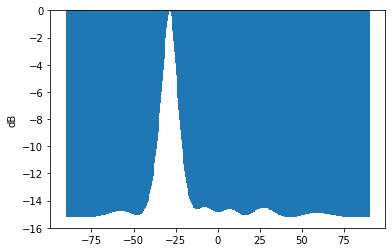

In [12]:
import matplotlib.pyplot as plt

plt.bar(A.MUSIC()[:,1],10*np.log(A.MUSIC()[:,0]/A.MUSIC()[:,0].max()))
plt.ylabel("dB",labelpad=5)

plt.show()